In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sqlite3 

In [2]:
cnx = sqlite3.connect('Desktop/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(180354, 42)

In [10]:
X = df.drop(["overall_rating"] , axis = 1)
y = df[["overall_rating"]]

In [11]:
X.describe()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,91995.886274,166822.125803,137653.145514,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,53092.657914,52821.443279,137599.735284,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,1.000000,2.000000,2625.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,46074.250000,156616.000000,35451.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,92003.500000,183792.000000,80291.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,137935.750000,200138.000000,192841.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,183978.000000,234141.000000,750584.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [12]:
X.head()

,id,player_fifa_api_id,player_api_id,date,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


In [14]:
X.drop(["id","player_fifa_api_id" , "player_api_id","date"] , axis = 1 , inplace = True)

In [16]:
ENCODER = []
for i in X.dtypes[X.dtypes == "object"].index:
    encoder = LabelEncoder()
    X[i] = encoder.fit_transform(X[i])
    ENCODER.append(encoder)
    print(i)

preferred_foot
attacking_work_rate
defensive_work_rate


In [17]:
X.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [18]:
sc = StandardScaler()
X_new = sc.fit_transform(X)

In [19]:
X_new = pd.DataFrame(X_new , columns= X.columns)
X_new.head()

,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.376706,0.568971,0.618645,0.382265,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
1,-0.376706,0.568971,0.618645,0.382265,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
2,-1.136360,0.568971,0.618645,0.382265,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,...,-0.255285,-0.445692,0.859417,0.727846,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
3,-1.288291,0.568971,0.618645,0.382265,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630
4,-1.288291,0.568971,0.618645,0.382265,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,...,-0.321282,-0.509973,0.718086,0.588286,0.832253,-0.575765,-0.375462,-0.545138,-0.560960,-0.542630


In [20]:
pca = PCA()
pca.fit_transform(X_new)

array([[ 1.08753390e+00,  2.68687017e+00, -1.63454568e+00, ...,
         5.90075273e-02,  1.16026169e-01,  2.88011880e-02],
       [ 1.08753390e+00,  2.68687017e+00, -1.63454568e+00, ...,
         5.90075273e-02,  1.16026169e-01,  2.88011880e-02],
       [ 1.35563229e+00,  2.03665668e+00, -2.23391338e+00, ...,
         1.00811724e-01,  1.11661603e-01,  2.44013117e-02],
       ...,
       [-3.52753387e+00, -2.54550632e+00,  2.59488343e+00, ...,
         1.37848433e-01,  4.68318215e-04,  5.28942216e-02],
       [-3.15213453e+00, -2.45072219e+00,  2.22166825e+00, ...,
         3.01998183e-02,  5.32563935e-03,  5.22289670e-02],
       [-3.40361003e+00, -2.01065466e+00,  1.63061265e+00, ...,
         1.73251417e-01,  8.75559045e-02, -1.46521315e-01]])

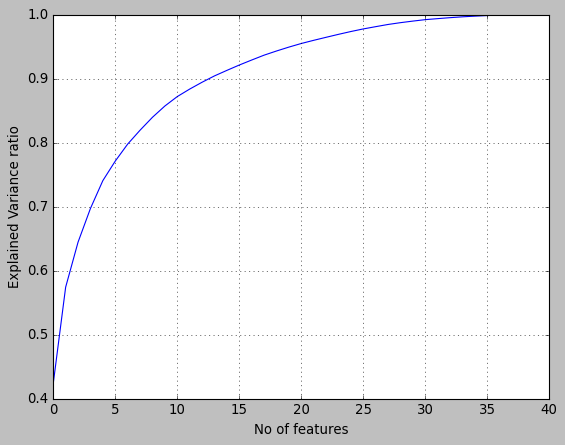

In [21]:
plt.style.use("classic")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of features")
plt.ylabel("Explained Variance ratio")
plt.grid(True)

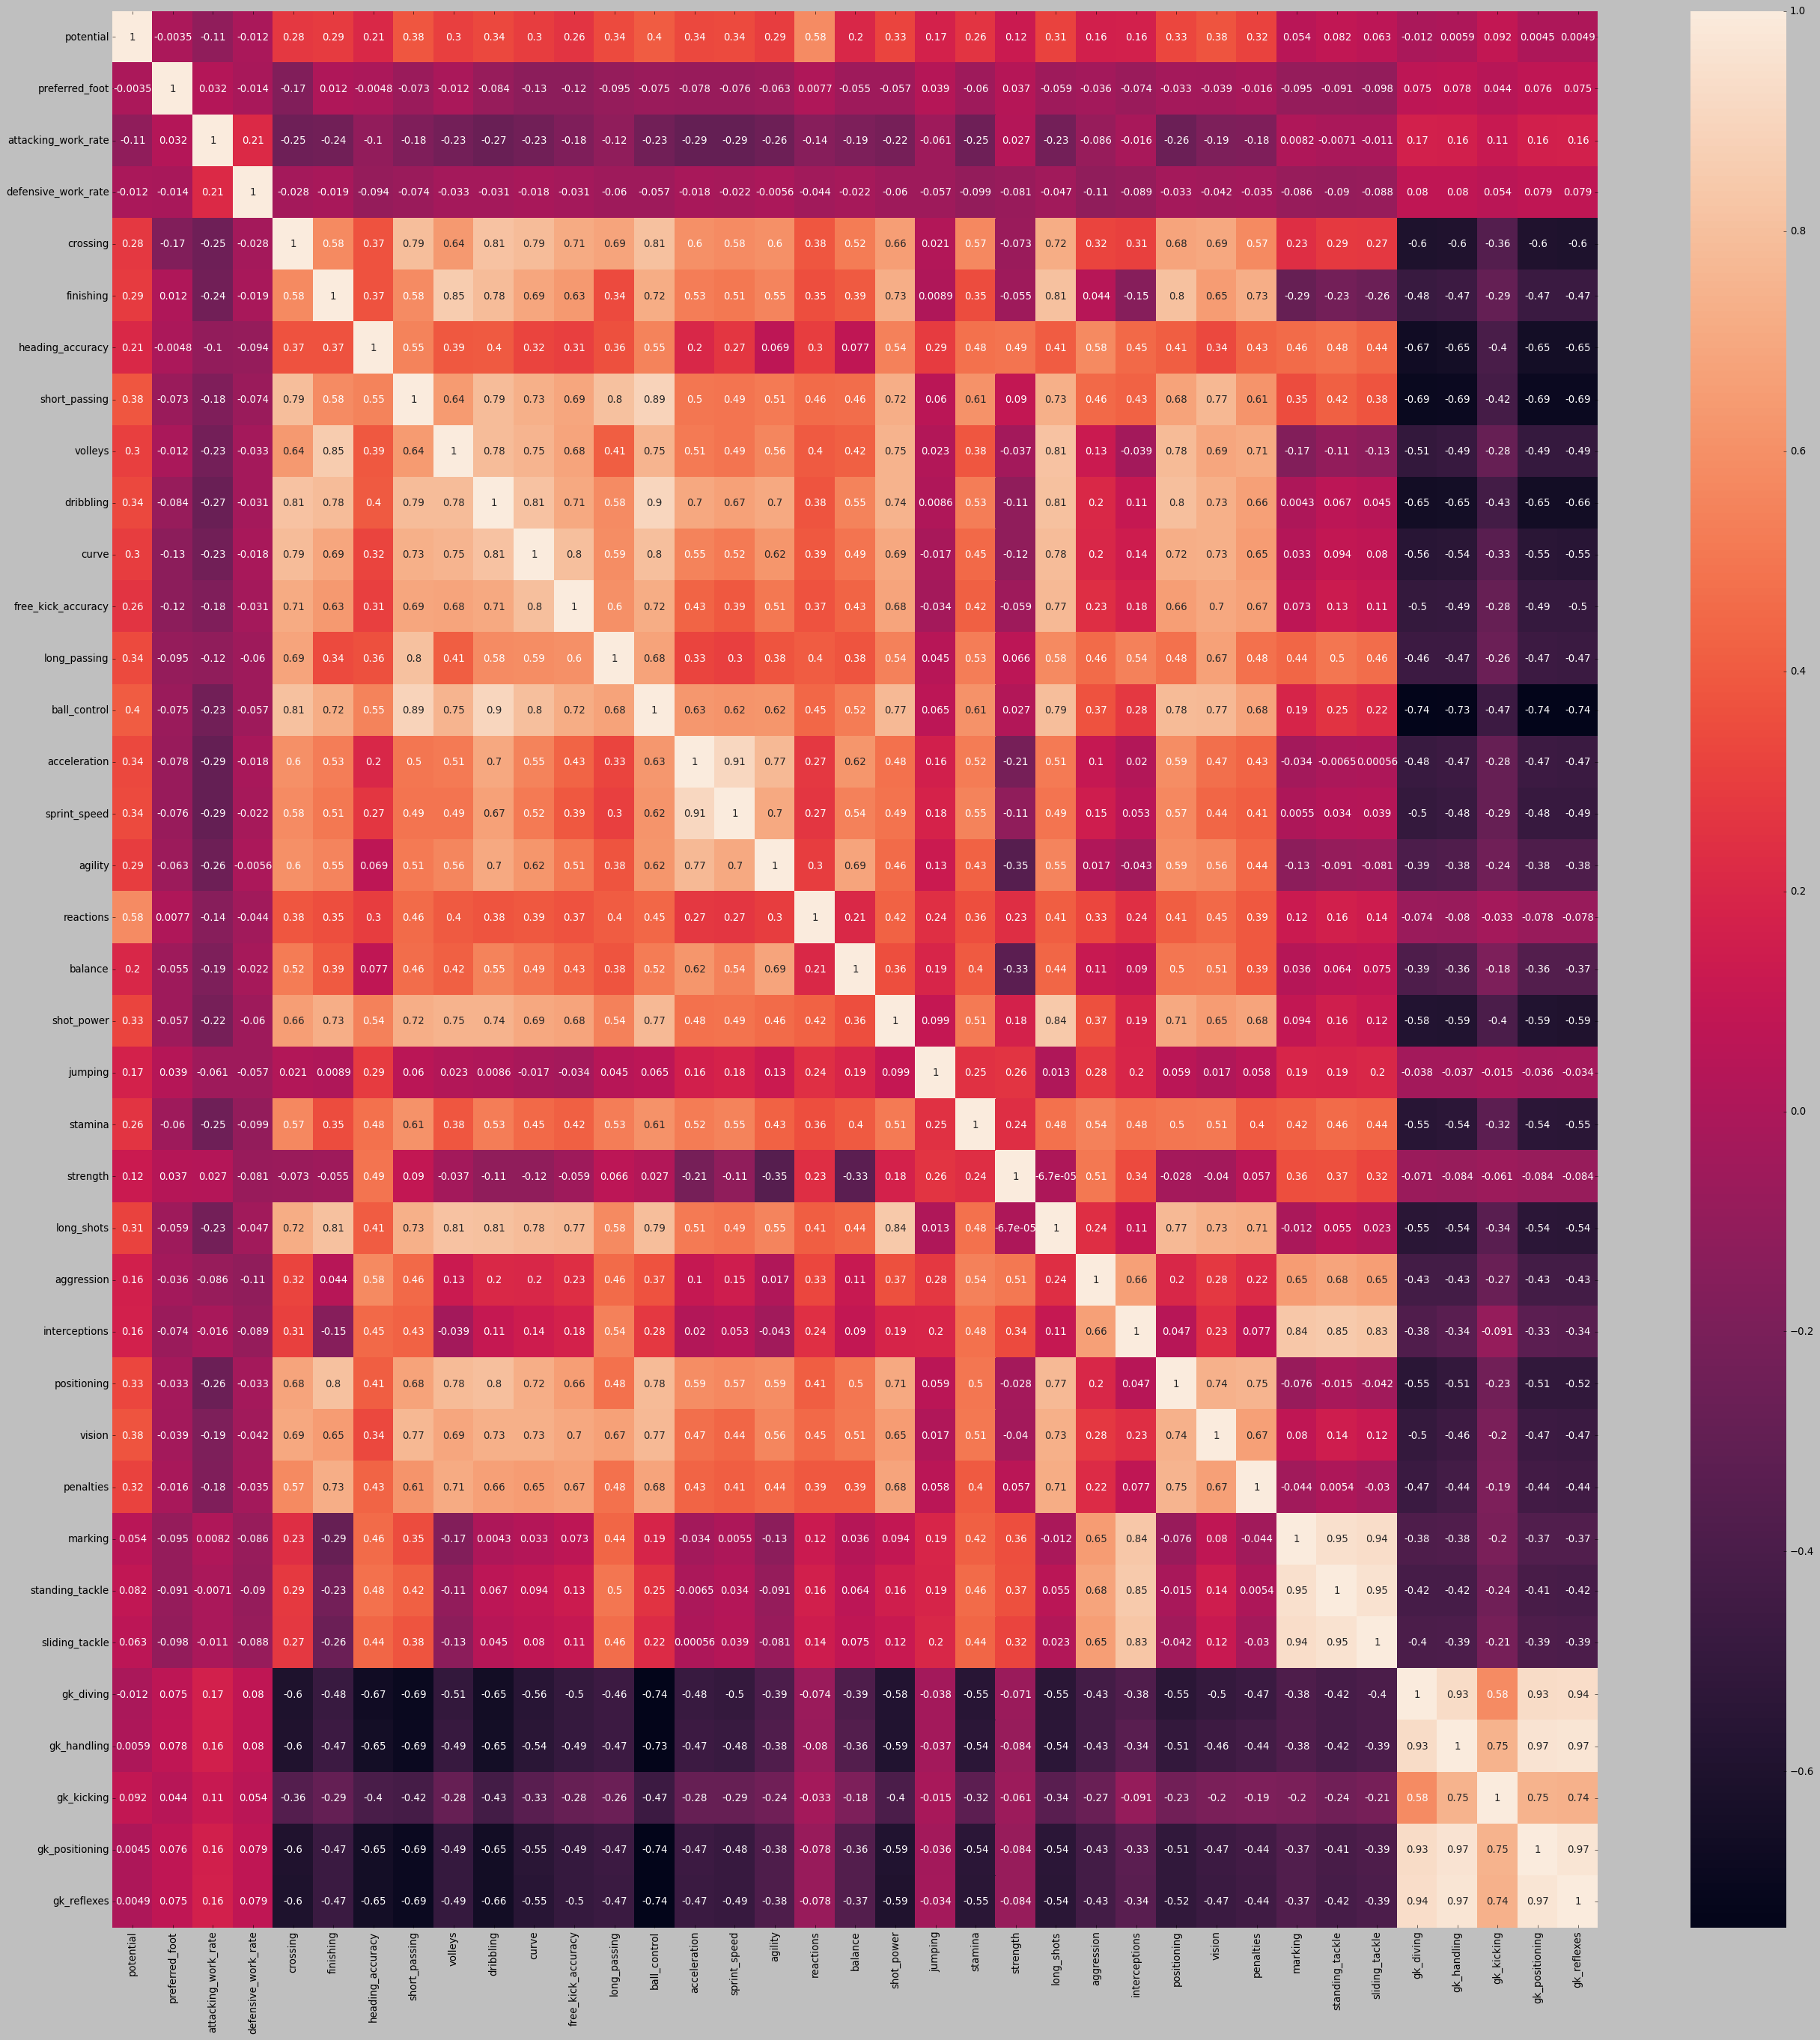

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(X_new.corr(), annot=True)

In [23]:
vif = []
for i in range(len(X_new.columns)):
    vif.append(variance_inflation_factor(np.array(X_new),i))

In [24]:
vif_df = pd.DataFrame({"Features":X_new.columns , "VIF":vif})
vif_df.head()

,Features,VIF
0,potential,2.147531
1,preferred_foot,1.079444
2,attacking_work_rate,1.195582
3,defensive_work_rate,1.071963
4,crossing,4.937557


In [25]:
for i in range(5):
    temp = vif_df[vif_df["VIF"] == max(vif_df["VIF"])]["Features"]
    X_new.drop(temp , axis = 1 , inplace=True)
    vif_df.drop((vif_df[vif_df["VIF"] == max(vif_df["VIF"])]).index , inplace=True)

In [26]:
X_new.shape

(180354, 32)

In [27]:
x_train, x_test , y_train , y_test = train_test_split(X_new , y , test_size = 0.25 , random_state = 101)

In [28]:
X_new.shape

(180354, 32)

In [29]:
y.shape

(180354, 1)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor

In [33]:
tree = DecisionTreeRegressor(criterion="mse")
tree.fit(x_train , y_train)
tree.score(x_test , y_test)

0.9494528303546681

In [34]:
ran_for = RandomForestRegressor()
ran_for.fit(x_train , y_train)
ran_for.score(x_test , y_test)

<ipython-input-34-e90062c6d7be>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_for.fit(x_train , y_train)


0.9778867130766757

In [47]:
parm = {
    "n_estimators": [10 , 100 , 150 , 200],
    "criterion": ["mse" , "mae"],
    "max_leaf_nodes" : range(2,10 ,4),
    "max_depth" : range(10,30,10),
    
}

In [48]:
rand_for = RandomForestRegressor()
grid = GridSearchCV(rand_for , param_grid = parm , cv = 5 , verbose=3)

In [49]:
grid.fit(x_train , y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10, score=0.431, total=   2.3s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10, score=0.415, total=   1.8s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10, score=0.430, total=   1.8s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10, score=0.418, total=   1.9s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=10, score=0.426, total=   1.8s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100, score=0.431, total=  18.1s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100, score=0.422, total=  16.9s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100, score=0.430, total=  17.3s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100, score=0.425, total=  17.2s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=100, score=0.433, total=  17.0s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150, score=0.431, total=  33.4s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150, score=0.422, total=  27.2s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150, score=0.430, total=  25.7s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150, score=0.424, total=  26.4s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=150, score=0.432, total=  26.3s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200, score=0.431, total=  35.5s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200, score=0.422, total=  33.9s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200, score=0.430, total=  34.5s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200, score=0.424, total=  34.1s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=2, n_estimators=200, score=0.432, total=  34.8s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10, score=0.666, total=   3.1s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10, score=0.657, total=   3.2s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10, score=0.673, total=   3.1s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10, score=0.664, total=   3.2s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=10, score=0.662, total=   3.2s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100, score=0.661, total=  31.3s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100, score=0.651, total=  31.5s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100, score=0.675, total=  30.5s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100, score=0.661, total=  31.7s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=100, score=0.668, total=  30.7s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150, score=0.664, total=  46.5s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150, score=0.654, total=  46.4s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150, score=0.672, total=  48.1s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150, score=0.661, total=  46.4s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=150, score=0.667, total=  46.7s
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200, score=0.662, total= 1.0min
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200, score=0.654, total= 1.0min
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200, score=0.673, total= 1.0min
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200, score=0.661, total= 1.1min
[CV] criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=10, max_leaf_nodes=6, n_estimators=200, score=0.668, total= 1.0min
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10, score=0.428, total=   1.8s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10, score=0.422, total=   1.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10, score=0.429, total=   1.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10, score=0.418, total=   1.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=10, score=0.433, total=   1.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100, score=0.431, total=  16.9s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100, score=0.422, total=  16.9s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100, score=0.430, total=  17.6s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100, score=0.424, total=  16.9s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=100, score=0.435, total=  18.5s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150, score=0.431, total=  25.5s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150, score=0.423, total=  26.5s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150, score=0.430, total=  25.6s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150, score=0.424, total=  26.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=150, score=0.430, total=  25.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200, score=0.430, total=  34.2s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200, score=0.422, total=  34.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200, score=0.430, total=  34.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200, score=0.424, total=  34.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=2, n_estimators=200, score=0.432, total=  34.7s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10, score=0.665, total=   3.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10, score=0.652, total=   3.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10, score=0.669, total=   3.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10, score=0.651, total=   3.2s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=10, score=0.663, total=   3.2s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100, score=0.663, total=  31.2s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100, score=0.654, total=  31.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100, score=0.672, total=  31.8s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100, score=0.660, total=  31.1s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=100, score=0.669, total=  30.8s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150, score=0.662, total=  48.2s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150, score=0.652, total=  47.6s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150, score=0.672, total=  47.3s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150, score=0.662, total=  47.3s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=150, score=0.670, total=  47.6s
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200, score=0.662, total= 1.1min
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200, score=0.652, total= 1.0min
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200, score=0.674, total= 1.1min
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200, score=0.662, total= 1.0min
[CV] criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200 .


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=mse, max_depth=20, max_leaf_nodes=6, n_estimators=200, score=0.669, total= 1.1min
[CV] criterion=mae, max_depth=10, max_leaf_nodes=2, n_estimators=10 ..


/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 